In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
#loading the dataset
netflix_overall=pd.read_csv("netflix_titles.csv")
imdb_ratings=pd.read_csv('IMDb ratings.csv',usecols=['weighted_average_vote'])
imdb_titles=pd.read_csv('IMDb movies.csv', usecols=['title','year','genre'])
netflix_overall.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [3]:
netflix_overall.count()

show_id         6234
type            6234
title           6234
director        4265
cast            5664
country         5758
date_added      6223
release_year    6234
rating          6224
duration        6234
listed_in       6234
description     6234
dtype: int64

In [4]:
netflix_overall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [5]:
netflix_shows=netflix_overall[netflix_overall['type']=='TV Show']

In [6]:
netflix_movies=netflix_overall[netflix_overall['type']=='Movie']

In [7]:
#TV Shows vs Movies

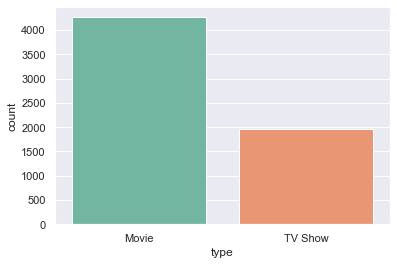

In [8]:
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=netflix_overall, palette="Set2")

In [9]:
#best month to release content

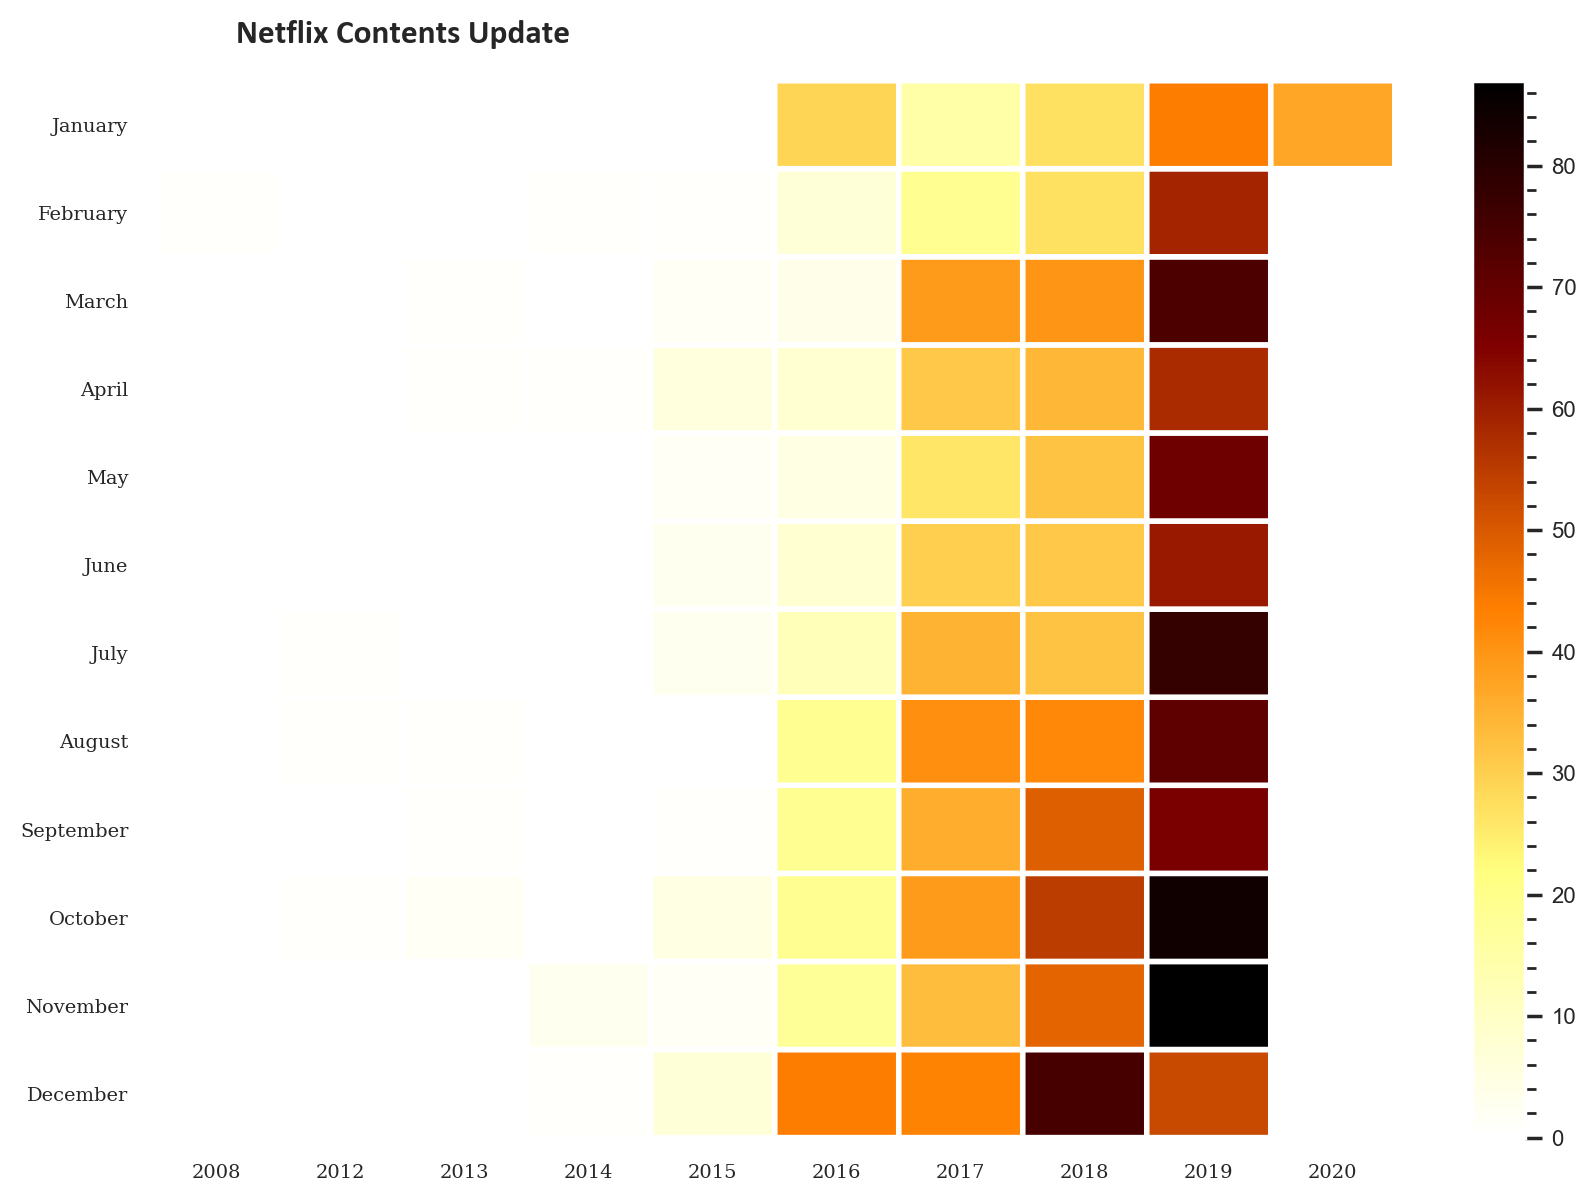

In [10]:
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

In [11]:
#TV Show Rating analysis

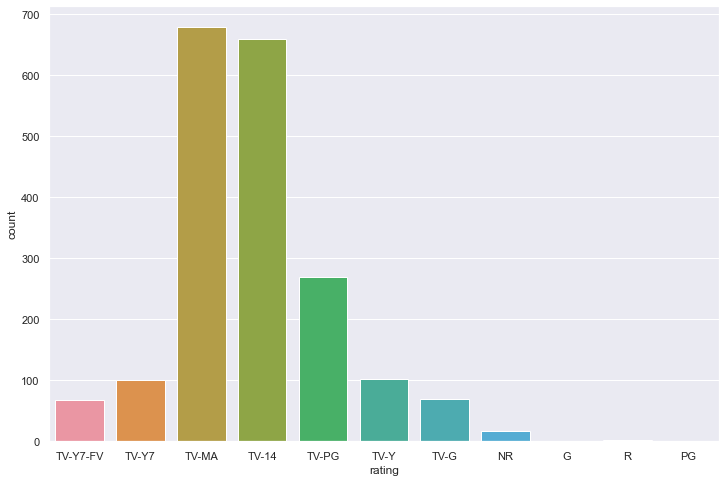

In [12]:
plt.figure(figsize = (12,8))
sns.countplot(x='rating',data = netflix_shows)

In [13]:
#Movies Rating Analysis

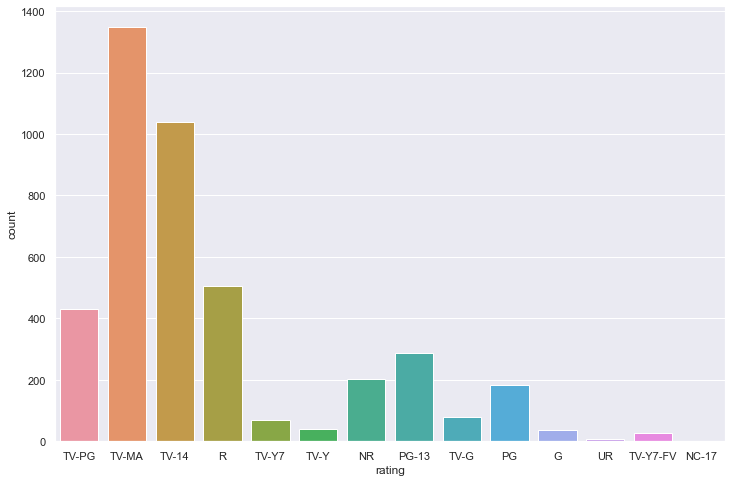

In [14]:
plt.figure(figsize = (12,8))
sns.countplot(x='rating',data = netflix_movies)

In [15]:
#Using IMBD Ratings

In [16]:
ratings = pd.DataFrame({'Title':imdb_titles.title,
                    'Release Year':imdb_titles.year,
                    'Rating': imdb_ratings.weighted_average_vote,
                    'Genre':imdb_titles.genre})
ratings.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)
ratings.head()

,Title,Release Year,Rating,Genre
0,The Story of the Kelly Gang,1906,6.1,"Biography, Crime, Drama"
1,Den sorte drøm,1911,5.9,Drama
2,Cleopatra,1912,5.2,"Drama, History"
3,L'Inferno,1911,7.0,"Adventure, Drama, Fantasy"
4,"From the Manger to the Cross; or, Jesus of Naz...",1912,5.7,"Biography, Drama"


In [17]:
ratings.dropna()
joint_data=ratings.merge(netflix_overall,left_on='Title',right_on='title',how='inner')
joint_data=joint_data.sort_values(by='Rating', ascending=False)

In [18]:
top_rated=joint_data[0:10]
fig =px.sunburst(
    data_frame=top_rated,
    values='Rating',
    path=['title','country'],
    color='Rating')
fig.show()

In [19]:
#countries with highest rated content

In [20]:
country_count=joint_data['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:11]
topcountries

,country
United States,1063
India,619
United Kingdom,135
Canada,60
"United Kingdom, United States",47
Spain,44
Turkey,41
Philippines,40
France,40
South Korea,38


In [21]:
data = dict(
    number=[1063,619,135,60,44,41,40,40,38,35],
    country=["United States", "India", "United Kingdom", "Canada", "Spain",'Turkey','Philippines','France','South Korea','Australia'])
fig = px.funnel(data, x='number', y='country')
fig.show()

In [22]:
#Year Wise Analysis (TV Shows)

Text(0.5, 1.0, 'Frequency of Movies which were released in different years and are available on Netflix')

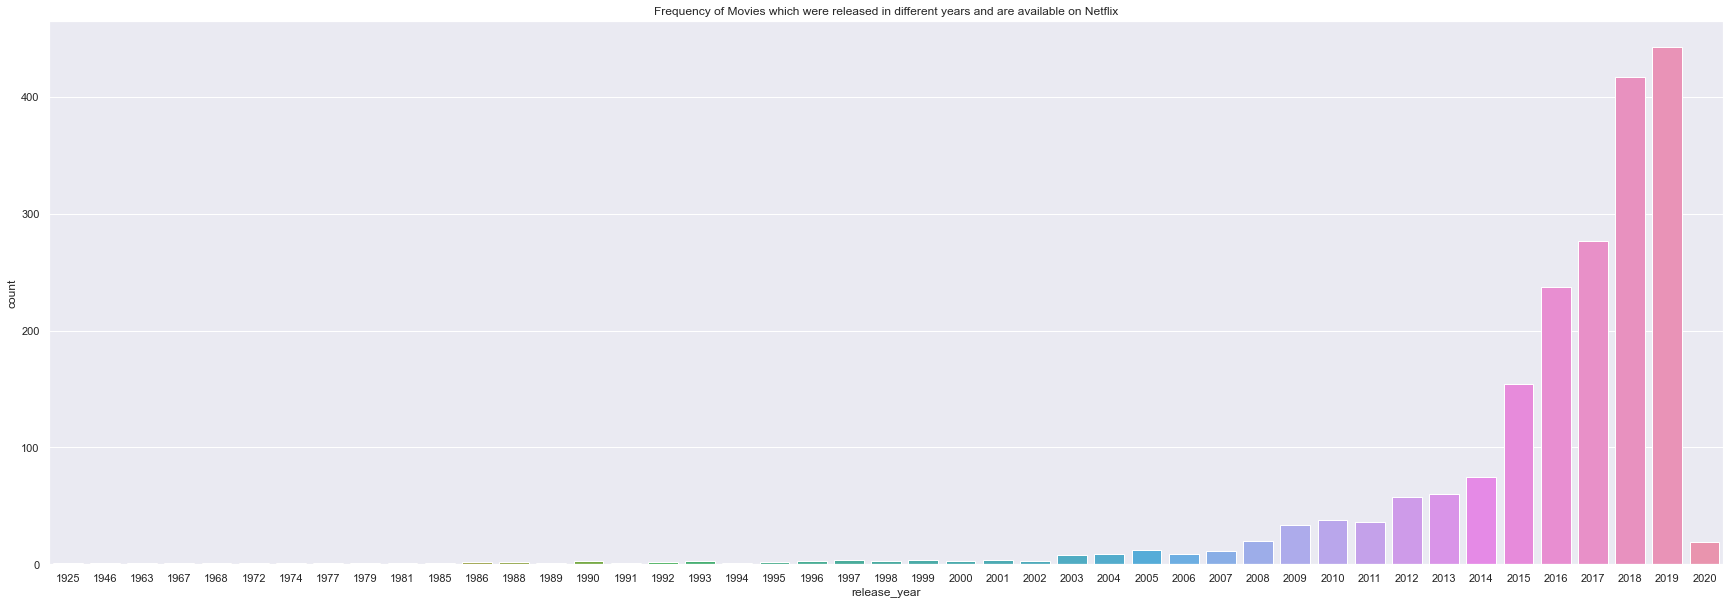

In [23]:
plt.figure(figsize=(30,10))
sns.countplot(x='release_year',data = netflix_shows)
plt.title("Frequency of Movies which were released in different years and are available on Netflix")

In [24]:
#year wise analysis (Movies)

Text(0.5, 1.0, 'Frequency of Tv shows which were released in different years and are available on Netflix')

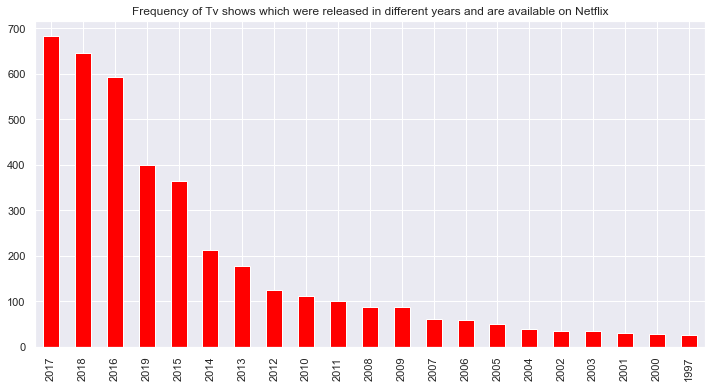

In [25]:
date = pd.DataFrame(netflix_shows.release_year.value_counts().reset_index().values, columns=["Year", "Count"])
plt.figure(figsize=(12,6))
netflix_overall[netflix_overall["type"]=="Movie"]["release_year"].value_counts()[:21].plot(kind="bar",color="Red")
plt.title("Frequency of Tv shows which were released in different years and are available on Netflix")

In [26]:
#Top 10 Content Creating Countries(Movies)

Text(0.5, 1.0, 'Top 20 countries in terms of maximum number of movies on netflix')

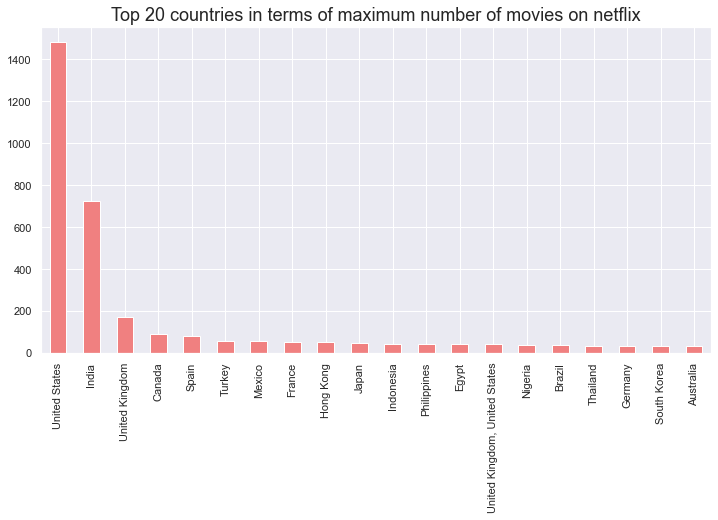

In [27]:
plt.figure(figsize=(12,6))
netflix_overall[netflix_overall["type"]=="Movie"]["country"].value_counts()[:20].plot(kind="bar",color="lightcoral")
plt.title("Top 20 countries in terms of maximum number of movies on netflix",size=18)

In [28]:
#Top 10 Content Creating Countries(TV Shows)

Text(0.5, 1.0, 'Top 20 countries in terms of maximum number of Tv shows on netflix')

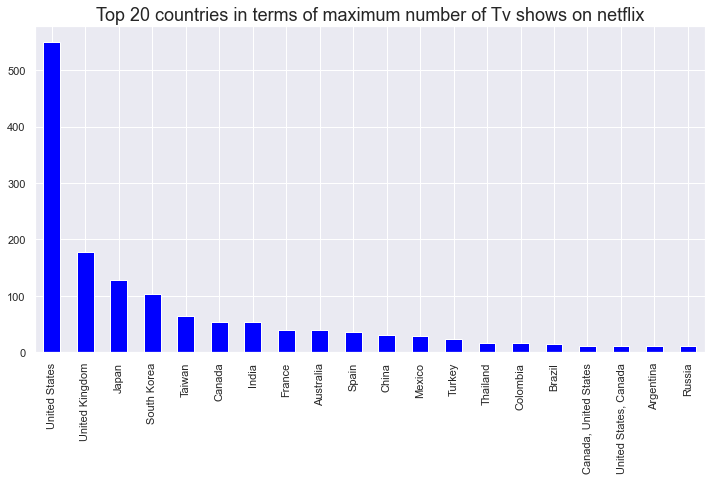

In [29]:
plt.figure(figsize=(12,6))
netflix_overall[netflix_overall["type"]=="TV Show"]["country"].value_counts()[:20].plot(kind="bar",color="blue")
plt.title("Top 20 countries in terms of maximum number of Tv shows on netflix",size=18)

In [30]:
#Analysis of Duration of Movies

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



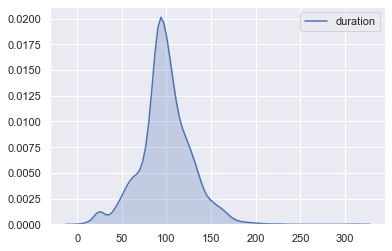

In [32]:
netflix_movies['duration']=netflix_movies['duration'].str.replace(' min','')
netflix_movies['duration'].str.replace(' min','')
netflix_movies['duration'].astype(str).astype(int)
netflix_movies['duration']
sns.set(style="darkgrid")
sns.kdeplot(data=netflix_movies['duration'], shade=True)

In [33]:
#lollipop plot of genre vs their count on netflix

In [34]:
genres=list(netflix_movies['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

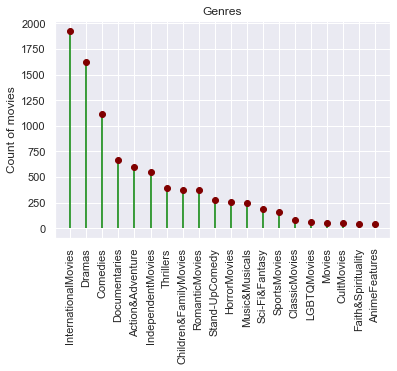

<Figure size 720x720 with 0 Axes>

In [35]:
g={k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}


fig, ax = plt.subplots()

fig = plt.figure(figsize = (10, 10))
x=list(g.keys())
y=list(g.values())
ax.vlines(x, ymin=0, ymax=y, color='green')
ax.plot(x,y, "o", color='maroon')
ax.set_xticklabels(x, rotation = 90)
ax.set_ylabel("Count of movies")
# set a title
ax.set_title("Genres");

In [36]:
#TV shows with seasons count

In [37]:
netflix_shows.head()
seasons=netflix_shows[['title','duration']]
for i in range(0,len(seasons)):
    #seasons['duration'].str.split(' ')
    seasons['duration']=seasons['duration'].str.replace(' Season','')
    seasons['duration']=seasons['duration'].str.replace('s','')
seasons.head()

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,duration
2,Transformers Prime,1
3,Transformers: Robots in Disguise,1
5,Apaches,1
8,Fire Chasers,1
26,Castle of Stars,1


In [38]:
seasons['duration']=seasons['duration'].astype(str).astype(int)

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
t=['title','duration']
top=seasons[t]

top=top.sort_values(by='duration', ascending=False)

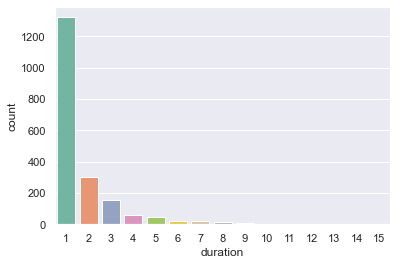

In [40]:
sns.set(style="darkgrid")
ax = sns.countplot(x="duration", data=seasons, palette="Set2")

In [41]:
#Top 20 TV shows with highest no. of seasons

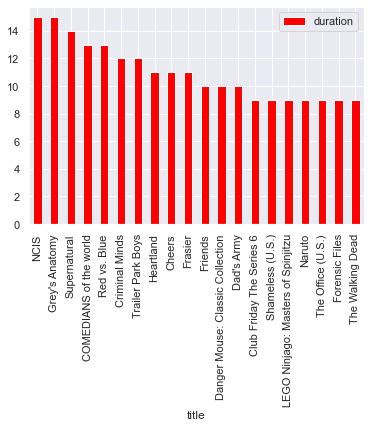

In [42]:
top20=top[0:20]
top20.plot(kind='bar',x='title',y='duration', color='red')

In [43]:
#Recommendation System (Content Based)

In [44]:
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
netflix_overall['description'] = netflix_overall['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(netflix_overall['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(6234, 16151)

In [45]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [46]:
indices = pd.Series(netflix_overall.index, index=netflix_overall['title']).drop_duplicates()

In [47]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_overall['title'].iloc[movie_indices]

In [48]:
get_recommendations('Peaky Blinders')

296                     Our Godfather
4491                              Don
2015                         The Fear
4852    Jonathan Strange & Mr Norrell
1231                       The Prison
3737                Power Rangers Zeo
5986                       The Tudors
1753      Once Upon a Time in Mumbaai
5494     The Legend of Michael Mishra
1142                  Shelby American
Name: title, dtype: object

In [49]:
get_recommendations('Mortel')

3016                  PILI Fantasy: War of Dragons
5688         Edgar Rice Burroughs' Tarzan and Jane
4401                             Figures of Speech
2001                                     FirstBorn
3310    My Entire High School Sinking Into the Sea
5307                                 Psychokinesis
4332                                At First Light
3955                          The Umbrella Academy
1761                                     Chamatkar
5421                              Maharakshak Devi
Name: title, dtype: object

In [50]:
#Content based Recommendation based on multiple metrics

In [51]:
filledna=netflix_overall.fillna('')
filledna.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...


In [52]:
def clean_data(x):
        return str.lower(x.replace(" ", ""))

In [53]:
features=['title','director','cast','listed_in','description']
filledna=filledna[features]

In [54]:
for feature in features:
    filledna[feature] = filledna[feature].apply(clean_data)
    
filledna.head(2)

,title,director,cast,listed_in,description
0,normofthenorth:kingsizedadventure,"richardfinn,timmaltby","alanmarriott,andrewtoth,briandobson,colehoward...","children&familymovies,comedies",beforeplanninganawesomeweddingforhisgrandfathe...
1,jandino:whateverittakes,,jandinoasporaat,stand-upcomedy,jandinoasporaatriffsonthechallengesofraisingki...


In [55]:
def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

In [56]:
filledna['soup'] = filledna.apply(create_soup, axis=1)

In [57]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna['soup'])

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [58]:
filledna=filledna.reset_index()
indices = pd.Series(filledna.index, index=filledna['title'])

In [59]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_overall['title'].iloc[movie_indices]

In [60]:
get_recommendations_new('PK', cosine_sim2)

5054                           3 Idiots
5494       The Legend of Michael Mishra
3093                  Anthony Kaun Hai?
2196                             Haapus
691                               Sanju
4110                   Taare Zameen Par
1449                    Chance Pe Dance
2194                    Chal Dhar Pakad
1746    EMI: Liya Hai To Chukana Padega
4920                   Khosla Ka Ghosla
Name: title, dtype: object

In [61]:
get_recommendations_new('Peaky Blinders', cosine_sim2)

3465                                   Giri / Haji
6050                   The Frankenstein Chronicles
2018                         The Murder Detectives
5529                                        Loaded
550                                      Bodyguard
2505                                 Kiss Me First
5859                                  Happy Valley
233     How to Live Mortgage Free with Sarah Beeny
522                          Terrorism Close Calls
1605                                Killer Ratings
Name: title, dtype: object

In [62]:
get_recommendations_new('The Hook Up Plan', cosine_sim2)

2576                     Melodies of Life - Born This Way
5273                                       Dancing Angels
5708                                        Little Things
2210                                           Rishta.com
5441    Club Friday To Be Continued - My Beautiful Tomboy
1155                                          Oh My Ghost
625                                  Accidentally in Love
789                                       College Romance
2030                                  แผนร้ายนายเจ้าเล่ห์
2480                                    Bangkok Bachelors
Name: title, dtype: object